In [1]:
import warnings

# To suppress all warnings
warnings.filterwarnings('ignore')

# Listings Data Cleaning

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [4]:
listings = pd.read_csv('./listings 2.csv')
df = listings.copy()



In [5]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_num,taken_30,taken_60,sales_30,sales_60,host_days_since,host_desc_len
0,3686,https://www.airbnb.com/rooms/3686,20231218032619,2023-12-18,city scrape,Home in Washington · ★4.64 · 1 bedroom · 1 bed...,NaN,We love that our neighborhood is up and coming...,https://a0.muscache.com/pictures/61e02c7e-3d66...,4645,https://www.airbnb.com/users/show/4645,Vita,2008-11-26,"Washington D.C., DC","I am a literary scholar, teacher, poet, vegan ...",NaN,NaN,100%,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Anacostia,1,4,"['email', 'phone', 'work_email']",t,t,"Washington, District of Columbia, United States",Historic Anacostia,NaN,38.86339,-76.98889,Private room in home,Private room,1,NaN,1 private bath,NaN,1.0,[],$67.00,31,365,31,31,365,365,31.0,365.0,NaN,t,30,60,90,365,2023-12-18,84,3,0,2010-11-01,2023-08-30,4.64,4.73,4.45,4.91,4.84,3.91,4.64,NaN,f,1,0,1,0,0.53,67.0,0,0,0.0,0.0,5608,1028
1,3943,https://www.airbnb.com/rooms/3943,20231218032619,2023-12-18,city scrape,Townhouse in Washington · ★4.83 · 1 bedroom · ...,NaN,This rowhouse is centrally located in the hear...,https://a0.muscache.com/pictures/airflow/Hosti...,5059,https://www.airbnb.com/users/show/5059,Vasa,2008-12-12,"Washington, DC",I travel often and always try to immerse mysel...,within an hour,100%,97%,t,https://a0.muscache.com/im/pictures/user/8ec69...,https://a0.muscache.com/im/pictures/user/8ec69...,Eckington,5,5,"['email', 'phone']",t,t,"Washington, District of Columbia, United States","Edgewood, Bloomingdale, Truxton Circle, Eckington",NaN,38.91195,-77.00456,Private room in townhouse,Private room,2,NaN,1 private bath,NaN,1.0,[],$66.00,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,8,11,11,252,2023-12-18,495,46,2,2009-05-10,2023-11-22,4.83,4.88,4.92,4.94,4.91,4.57,4.75,Hosted License: 5007242201001033,f,5,0,5,0,2.78,66.0,22,49,1452.0,3234.0,5592,445
2,4197,https://www.airbnb.com/rooms/4197,20231218032619,2023-12-18,city scrape,Home in Washington · ★4.85 · 1 bedroom · 1 bed...,NaN,"Our area, the Eastern Market neighborhood of C...",https://a0.muscache.com/pictures/miso/Hosting-...,5061,https://www.airbnb.com/users/show/5061,Sandra,2008-12-12,"Washington D.C., DC",I’m a California native who came to work for t...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/93c77...,https://a0.muscache.com/im/pictures/user/93c77...,Capitol Hill,2,2,"['email', 'phone']",t,t,"Washington, District of Columbia, United States","Capitol Hill, Lincoln Park",NaN,38.88719,-76.99472,Private room in home,Private room,1,NaN,1.5 shared baths,NaN,1.0,[],$135.00,7,1125,7,7,1125,1125,7.0,1125.0,NaN,t,6,21,51,321,2023-12-18,58,6,0,2009-0

In [ ]:
df['price_num'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

df['taken_30'] = 30-df['availability_30']
df['taken_60'] = 60-df['availability_60']

df['sales_30'] = df['taken_30'] * df['price_num']
df['sales_60'] = df['taken_60'] * df['price_num']

# Column types
df['host_since'] = pd.to_datetime(df['host_since'])
df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])

specific_date = pd.to_datetime('2024-04-04')
df['host_days_since'] = (specific_date - df['host_since']).dt.days
df['host_desc_len'] = [0 if pd.isna(i) else len(i) for i in df['host_about']]

In [6]:
df['sales_30'].describe()

count      5995.000000
mean       2463.492410
std        5721.067316
min           0.000000
25%         250.000000
50%        1500.000000
75%        3187.500000
max      210000.000000
Name: sales_30, dtype: float64

## Histogram on sales_30 to visualize outliers

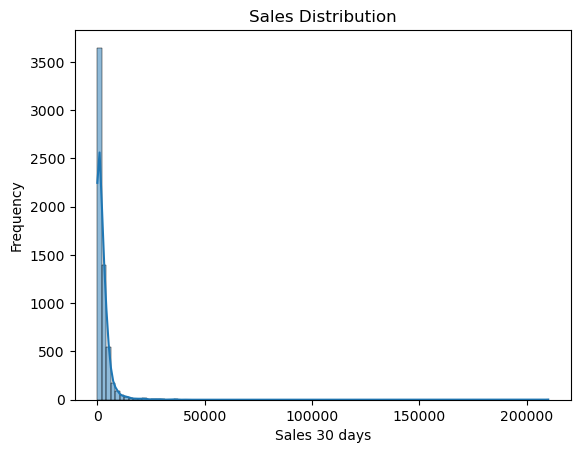

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['sales_30'], bins=100, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales 30 days')
plt.ylabel('Frequency')
plt.show()

## Remove Outliers for sales_30

In [8]:
# Calculate Q1 (25th percentile of the data) for the 'price' column
Q1 = df['sales_30'].quantile(0.25)

# Calculate Q3 (75th percentile of the data) for the 'price' column
Q3 = df['sales_30'].quantile(0.75)

# Calculate the IQR by subtracting Q1 from Q3
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_filtered = df[(df['sales_30'] <= upper_bound)]

In [9]:
print("Upper Quartile : ", Q3)

print("Rows kept : ",df[(df['sales_30'] <= upper_bound)].shape[0])
print("Rows dropped : ",df[(df['sales_30'] >= upper_bound)].shape[0])


Upper Quartile :  3187.5
Rows kept :  5714
Rows dropped :  281


## Visualize data to find correlation

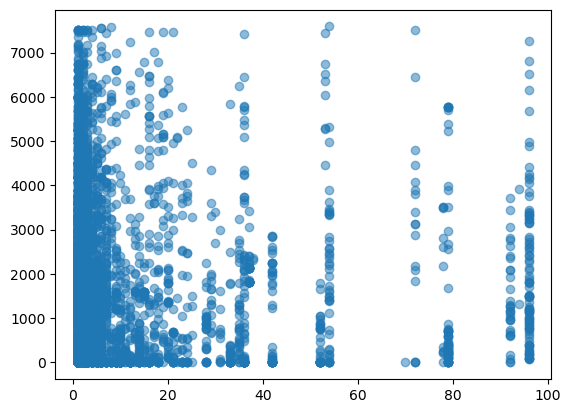

In [10]:
plt.scatter(df_filtered[df_filtered['host_listings_count']<100]['host_listings_count'],df_filtered[df_filtered['host_listings_count']<100]['sales_30'], alpha = 0.5)
plt.show()

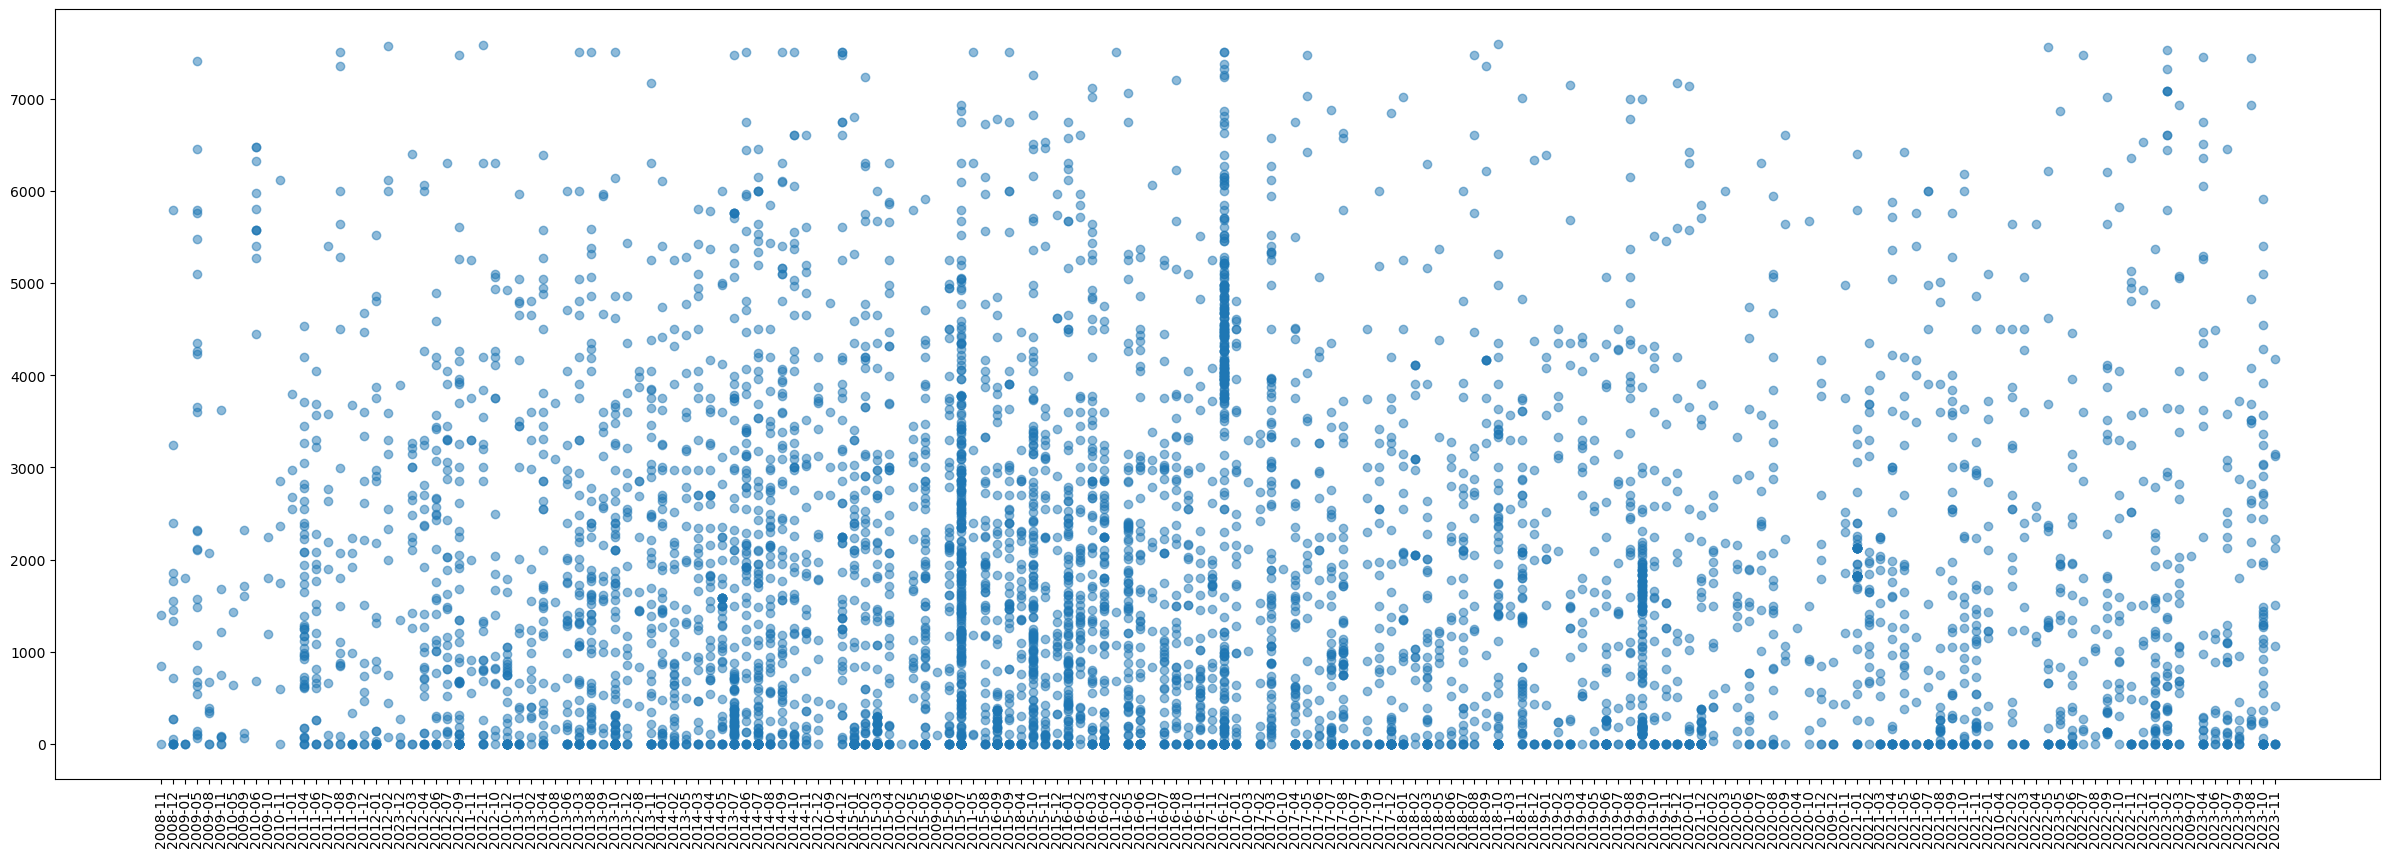

In [11]:
plt.figure(figsize=(30,10))
plt.scatter(df_filtered['host_since'].dt.strftime('%Y-%m'),df_filtered['sales_30'], alpha = 0.5)
plt.xticks(rotation=90)
plt.show()


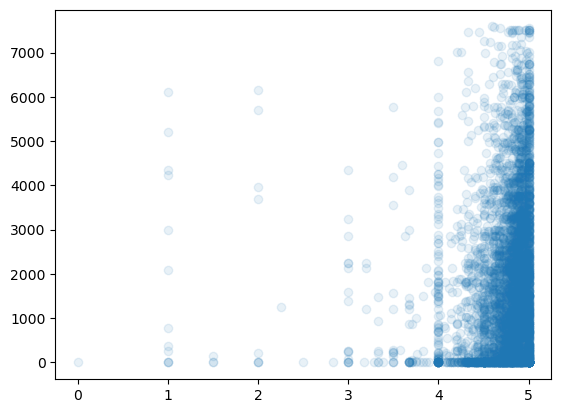

In [12]:
plt.scatter(df_filtered['review_scores_rating'],df_filtered['sales_30'], alpha = 0.1)
plt.show()

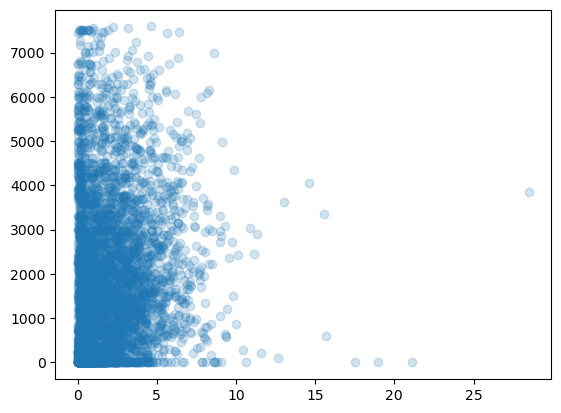

In [13]:
plt.scatter(df_filtered['reviews_per_month'],df_filtered['sales_30'], alpha = 0.2)
plt.show()

In [14]:
df[['sales_30','review_scores_cleanliness','review_scores_location','review_scores_communication','review_scores_value']].corr()

,sales_30,review_scores_cleanliness,review_scores_location,review_scores_communication,review_scores_value
sales_30,1.000000,0.064671,0.081810,0.047638,0.048657
review_scores_cleanliness,0.064671,1.000000,0.441045,0.564298,0.669800
review_scores_location,0.081810,0.441045,1.000000,0.469953,0.532264
review_scores_communication,0.047638,0.564298,0.469953,1.000000,0.682926
review_scores_value,0.048657,0.669800,0.532264,0.682926,1.000000


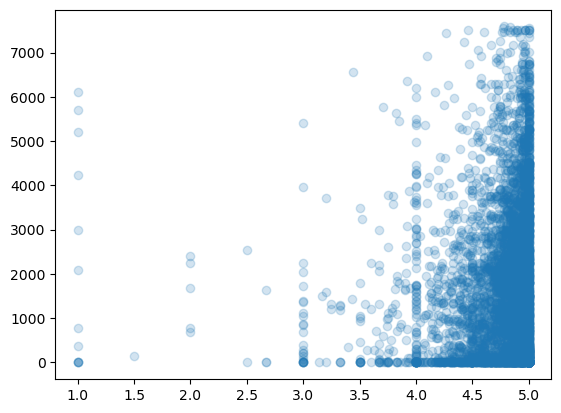

In [15]:
plt.scatter(df_filtered['review_scores_location'],df_filtered['sales_30'], alpha = 0.2)
plt.show()

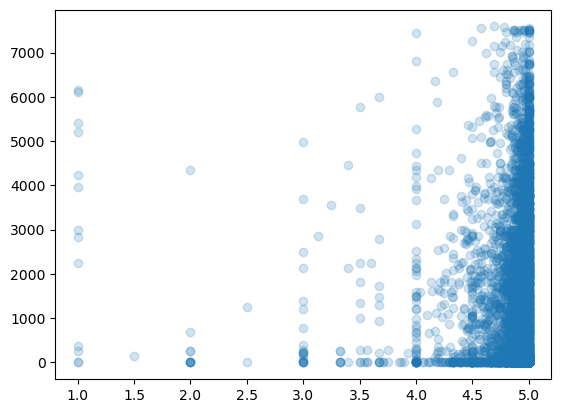

In [16]:
plt.scatter(df_filtered['review_scores_communication'],df_filtered['sales_30'], alpha = 0.2)
plt.show()

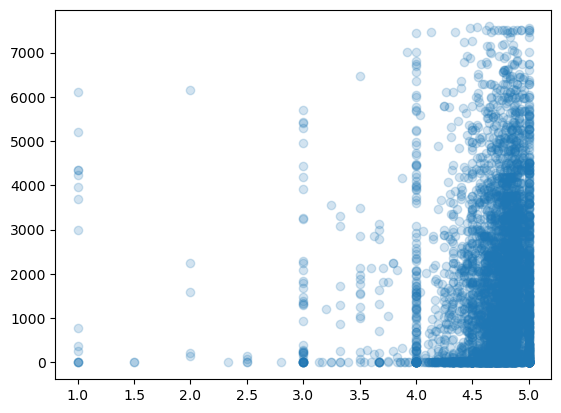

In [17]:
plt.scatter(df_filtered['review_scores_value'],df_filtered['sales_30'], alpha = 0.2)
plt.show()


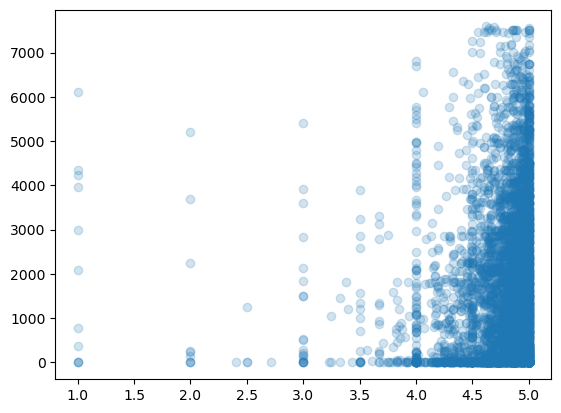

In [18]:
plt.scatter(df_filtered['review_scores_cleanliness'],df_filtered['sales_30'], alpha = 0.2)
plt.show()

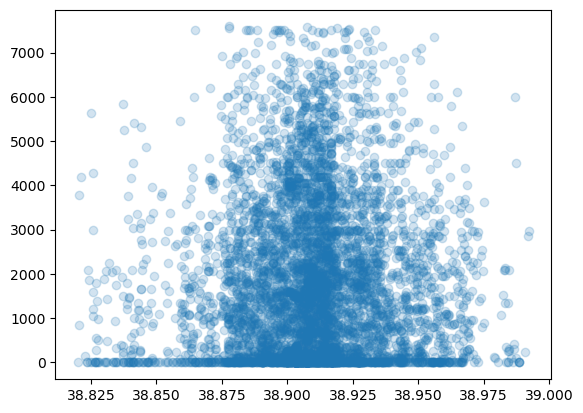

In [19]:
plt.scatter(df_filtered['latitude'],df_filtered['sales_30'], alpha = 0.2)
plt.show()

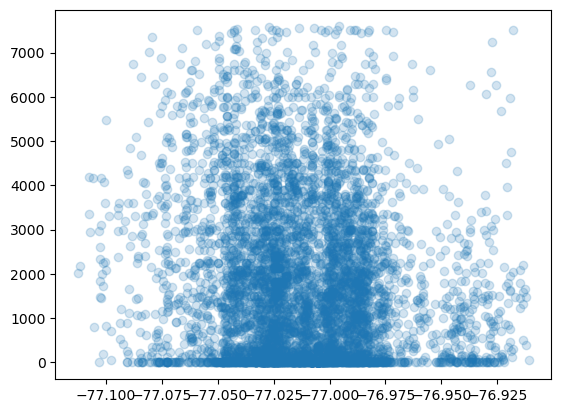

In [20]:
plt.scatter(df_filtered['longitude'],df_filtered['sales_30'], alpha = 0.2)
plt.show()

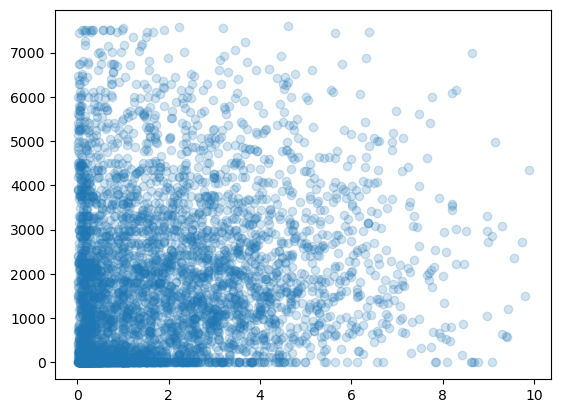

In [21]:
plt.scatter(df_filtered[df_filtered['reviews_per_month']<10]['reviews_per_month'],df_filtered[df_filtered['reviews_per_month']<10]['sales_30'], alpha = 0.2)
plt.show()

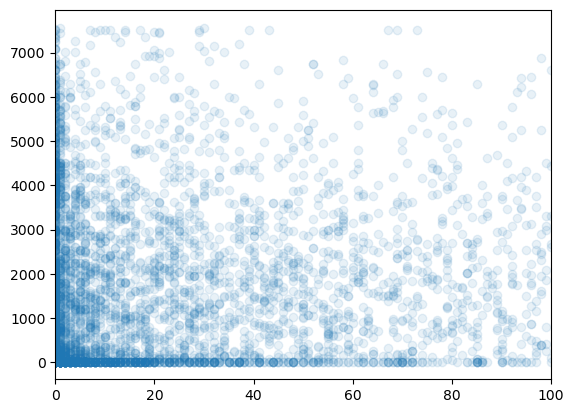

In [22]:
plt.scatter(df_filtered['number_of_reviews'],df_filtered['sales_30'], alpha = 0.1)
plt.xlim(left = 0, right=100)
plt.show()

## Most appeared words for "host_about"

In [23]:
import pandas as pd
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords if you haven't already
nltk.download('stopwords')

# Set of English stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sungyeonkim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
df_filtered['host_about_clean'] = df_filtered['host_about'].str.lower().str.replace(r'[^a-zA-Z\s]', '', regex=True)

def clean_and_tokenize(text):
    # Lowercase and remove punctuation/numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    # Tokenize by splitting on whitespace
    tokens = text.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Apply the function to each row in the 'host_about' column
# and concatenate all tokens into a single list
all_words = []
for text in df_filtered['host_about_clean'].dropna():
    all_words.extend(clean_and_tokenize(text))

# Count the words and return the top 100
word_counts = Counter(all_words)
top_100_words = word_counts.most_common(100)

In [25]:
word_counts

Counter({'dc': 2265,
         'home': 2224,
         'stay': 2036,
         'enjoy': 1575,
         'love': 1555,
         'experience': 1436,
         'apartment': 1234,
         'sojourn': 1138,
         'washington': 1052,
         'im': 968,
         'city': 958,
         'youll': 957,
         'travel': 839,
         'around': 745,
         'guest': 733,
         'new': 730,
         'world': 725,
         'well': 694,
         'people': 689,
         'one': 689,
         'quality': 683,
         'years': 682,
         'airbnb': 663,
         'make': 659,
         'guests': 647,
         'us': 637,
         'team': 626,
         'find': 596,
         'designed': 586,
         'rental': 571,
         'fully': 568,
         'services': 560,
         'everything': 551,
         'day': 546,
         'making': 543,
         'linens': 525,
         'thoughtfully': 523,
         'like': 517,
         'living': 514,
         'always': 508,
         'towels': 506,
         'homes': 493,
  

In [26]:
from scipy import stats

top_50_words = word_counts.most_common(1000)
top_50_words

p_values = []

for a,b in top_50_words:

    df_filtered[a] = df_filtered['host_about_clean'].apply(lambda x: 1 if isinstance(x, str) and a in x.lower() else 0)
    
    # Splitting the numerical column based on the binary column
    group_0 = df_filtered[df_filtered[a] == 0]['price_num']
    group_1 = df_filtered[df_filtered[a] == 1]['price_num']

    mean_diff = (group_1.mean() - group_0.mean())

    # Running a t-test
    t_stat, p_value = stats.ttest_ind(group_0, group_1)
    
    if p_value <= 0.05 and abs(mean_diff)>100:
        p_values.append((a,p_value,mean_diff))

In [27]:
p_values

[('youll', 4.092972093665379e-17, 254.63227144948493),
 ('make', 5.990564558612058e-08, 122.53838126221297),
 ('find', 6.595484560340307e-06, 102.95899304533617),
 ('like', 6.349939290889999e-08, 130.718735851316),
 ('needs', 3.818486935917165e-09, 155.1881929487272),
 ('feel', 4.934445156411576e-13, 184.25497548288212),
 ('want', 1.9643552375464642e-11, 171.7949655537891),
 ('space', 2.6735737904854987e-06, 102.42734660057812),
 ('house', 6.279182045568574e-15, 195.19882906547682),
 ('built', 8.615746316983017e-18, 278.20637493765105),
 ('located', 0.0041400773251468945, 111.81876319561971),
 ('settle', 6.549851110835323e-18, 283.7933170305306),
 ('set', 8.941720919765064e-08, 136.46327603629751),
 ('available', 2.8749564297765425e-05, 187.02398477948972),
 ('shared', 1.5363058816925555e-07, 221.63902419209768),
 ('excited', 0.003774259150634392, 116.39502152694433),
 ('kitchen', 5.532487767439197e-13, 158.01524730057034),
 ('choose', 0.019896621455327366, -106.82971753127337),
 ('exp

<Axes: xlabel='minutes', ylabel='sales_30'>

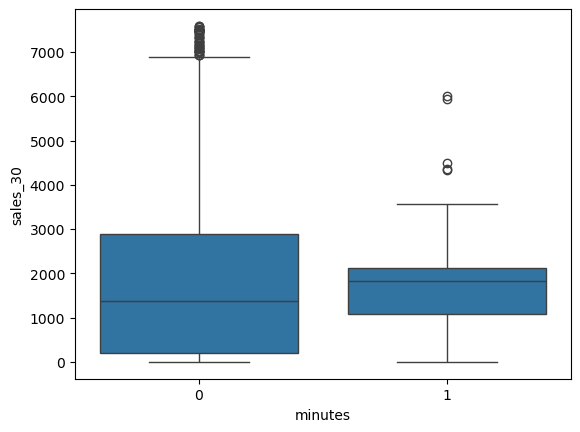

In [28]:
sns.boxplot(x='minutes',y='sales_30',data = df_filtered)

# Reviews Data Cleaning

In [30]:
reviews = pd.read_csv('./reviews 2.csv')

In [31]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3686,131293,2010-11-01,257234,Callie,Staying with Levita and her wonderful family w...
1,67483,178804,2011-02-06,74805,Nathan,We had a wonderful stay! It's a beautiful hous...
2,67483,186099,2011-02-21,41558,Rajeev,Looks like my last review didn't get posted. \...
3,67483,215731,2011-04-03,368549,Sarah-Marie,I visited DC with my boyfriend from Germany. C...
4,67483,255742,2011-05-08,530299,Marci,The upstairs apartment was charming and comfor...


In [32]:
reviews['comments'] = reviews['comments'].astype(str)

grouped_df = reviews.groupby('listing_id').agg({'comments': ' '.join}).reset_index()

grouped_df.iloc[0].comments

'Staying with Levita and her wonderful family was an amazing experience. They were so welcoming to me and her home was great. I cannot express enough how nice my experience was. Not only is Levita\'s home very close to the metro, extremely comfortable, but her vegan cooking was incredible as well. Anyone would be lucky to stay with such a friendly, welcoming family. Vita is a very welcoming, helpful and friendly host and a great cook. Her house is located in an interesting, not to say fascinating, area of Washington DC. Transport connections are close by and very frequent, the house (and the room where I stayed) are furnished in a very elegant style and I was always happy to come home in the evening to the friendly atmosphere of the household of Vita and her two daughters.    This was my first time using "airbnb" and it made me wonder why I ever stayed in hotels in the past!! Vita was the most incredible host. Her home was warm and inviting,  full of beautiful artwork and artistic peop

In [33]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re

# Sample string
text = grouped_df.iloc[2].comments

# Tokenize the text
words = nltk.word_tokenize(text)

# Convert words to lowercase
words = [word.lower() for word in words]

# Remove punctuation and non-alphabetic characters
words = [re.sub(r'[^a-zA-Z]', '', word) for word in words if word.isalpha()]

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Count word frequencies
word_freq = Counter(filtered_words)

# Get the top 10 most common words
top_10_words = word_freq.most_common(10)

print(top_10_words)


[('sandra', 86), ('house', 38), ('place', 33), ('home', 32), ('great', 31), ('stay', 26), ('location', 24), ('host', 22), ('nice', 21), ('dc', 19)]


# Geojson

In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt


gdf = gpd.read_file('./neighbourhoods.geojson')

In [38]:
gdf.head()

,neighbourhood,neighbourhood_group,geometry
0,"Congress Heights, Bellevue, Washington Highlands",None,"MULTIPOLYGON (((-77.01389 38.82865, -77.01386 ..."
1,"Douglas, Shipley Terrace",None,"MULTIPOLYGON (((-76.99291 38.85391, -76.99231 ..."
2,"Woodland/Fort Stanton, Garfield Heights, Knox ...",None,"MULTIPOLYGON (((-76.97714 38.85728, -76.97721 ..."
3,"Near Southeast, Navy Yard",None,"MULTIPOLYGON (((-76.97936 38.87756, -76.97937 ..."
4,"River Terrace, Benning, Greenway, Dupont Park",None,"MULTIPOLYGON (((-76.93760 38.88996, -76.93752 ..."


In [39]:
from shapely.geometry import Point

In [41]:
# Convert DataFrame to GeoDataFrame
# 'coordinates' is a tuple (longitude, latitude)
gdf_points = gpd.GeoDataFrame(df_filtered, geometry=[Point(x, y) for x, y in zip(df_filtered.longitude,df_filtered.latitude)])

# Read the GeoJSON file into a GeoDataFrame
gdf = gpd.read_file('./neighbourhoods.geojson')

# Ensure both GeoDataFrames use the same CRS
# polygons_gdf.crs will give you the CRS of the GeoJSON file
gdf_points.crs = gdf.crs

# Perform a spatial join
# This adds the attributes of polygons_gdf to gdf_points where the points fall within the polygons
joined_gdf = gpd.sjoin(gdf_points, gdf, how="left", predicate='within')

In [42]:
joined_gdf.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_left,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_num,taken_30,taken_60,sales_30,sales_60,host_days_since,host_desc_len,host_about_clean,dc,home,stay,enjoy,love,experience,apartment,sojourn,washington,im,city,youll,travel,around,guest,new,world,well,people,one,quality,years,airbnb,make,guests,us,team,find,designed,rental,fully,services,everything,day,making,linens,thoughtfully,like,living,always,towels,homes,upon,best,youre,need,even,host,business,hi,share,provide,kitchens,apartments,access,offer,company,every,time,hospitality,equipped,local,hosting,wifi,long,needs,feel,traveling,welcome,blueground,comfortable,want,month,ensure,properties,free,forward,space,family,great,rentals,buildings,also,arrive,help,life,longer,furnished,beautiful,away,flexible,area,support,get,live,spaces,house,better,meeting,neighborhoods,arrival,year,cities,easy,travelers,extra,unique,made,know,professional,rent,let,providing,understand,plus,look,work,lived,places,reliable,high,phone,luxury,several,book,many,outdoor,based,built,property,check,hour,ive,possible,neighborhood,vacation,pools,instructions,confirm,via,friends,please,curated,given,looking,request,cleaning,furniture,ask,furnishings,select,nations,confirmation,number,details,located,centrally,personally,either,complete,carefully,working,capitol,global,terms,core,special,temporary,vibrant,car,email,expectations,consistent,capital,entire,major,since,premium,growing,member,grocery,app,place,nicole,listings,easily,settle,entertainment,understanding,set,superior,cofounder,routine,alternative,seamless,fluid,incredible,disruptive,raison,detre,mattresses,cater,thousand,professionally,online,hasslefree,smart,pay,gyms,enhance,stress,proptech,moveinready,roam,exclusive,fivestar,highspeed,starts,uptodate,click,securely,delivery,laundry,partnerships,greeted,selfcheckin,whether,visit,much,amazing,available,born,monthly,clean,good,restaurants,ready,call,hill,sweet,hope,renting,happy,would,different,shared,excited,native,safe,fun,questions,two,resident,food,favorite,give,dcs,including,kitchen,hello,discover,quickly,going,music,traveler,short,husband,near,things,exact,next,experiences,hidden,come,originally,loves,see,hosts,wife,metro,prior,simple,friendly,cultures,way,district,condos,warm,manage,locations,rest,choose,exploring,location,room,international,helps,try,times,service,dining,public,met,sharing,private,welcoming,sure,cleaned,rooms,tv,traveled,areas,wonderful,historic,full,lots,roommates,meet,passion,coming,unfurnished,countries,trip,household,accommodations,alone,art,broker,take,lot,pleasure,others,moved,started,museums,essentials,costs,studio,customized,june,affordably,bypassing,fees,delivered,cleanings,easiest,hard,expect,term,advice,loved

In [51]:
df.select_dtypes(include='number')


,id,scrape_id,description,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_num,taken_30,taken_60,sales_30,sales_60,host_days_since,host_desc_len
0,3686,20231218032619,NaN,4645,1,4,NaN,38.863390,-76.988890,1,NaN,NaN,1.0,31,365,31,31,365,365,31.0,365.0,NaN,30,60,90,365,84,3,0,4.64,4.73,4.45,4.91,4.84,3.91,4.64,1,0,1,0,0.53,67.0,0,0,0.0,0.0,5608,1028
1,3943,20231218032619,NaN,5059,5,5,NaN,38.911950,-77.004560,2,NaN,NaN,1.0,1,1125,1,1,1125,1125,1.0,1125.0,NaN,8,11,11,252,495,46,2,4.83,4.88,4.92,4.94,4.91,4.57,4.75,5,0,5,0,2.78,66.0,22,49,1452.0,3234.0,5592,445
2,4197,20231218032619,NaN,5061,2,2,NaN,38.887190,-76.994720,1,NaN,NaN,1.0,7,1125,7,7,1125,1125,7.0,1125.0,NaN,6,21,51,321,58,6,0,4.85,4.98,4.87,5.00,4.98,4.96,4.95,2,0,2,0,0.33,135.0,24,39,3240.0,5265.0,5592,239
3,4529,20231218032619,NaN,5803,4,4,NaN,38.905850,-76.944690,2,NaN,NaN,1.0,30,1125,30,30,1125,1125,30.0,1125.0,NaN,29,59,89,179,102,0,0,4.66,4.80,4.60,4.93,4.93,4.51,4.83,2,0,2,0,0.58,56.0,1,1,56.0,56.0,5574,62
4,4967,20231218032619,NaN,7086,3,6,NaN,38.912170,-76.992490,1,NaN,NaN,1.0,1125,1125,1125,1125,1125,1125,1125.0,1125.0,NaN,30,60,90,365,30,0,0,4.74,4.68,4.89,4.93,4.93,4.21,4.64,3,0,3,0,0.19,2500.0,0,0,0.0,0.0,5547,172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6848,1047064894296117631,20231218032619,NaN,107434423,4820,6438,NaN,38.906922,-77.024228,2,NaN,NaN,1.0,32,1125,32,365,1125,1125,354.1,1125.0,NaN,0,0,0,105,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234,234,0,0,NaN,173.0,30,60,5190.0,10380.0,2666,1405
6849,1047730533367174366,20231218032619,NaN,437660791,33,59,NaN,38.949640,-77.016980,2,NaN,NaN,1.0,1,365,1,1,365,365,1.0,365.0,NaN,27,57,87,267,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,6,22,0,NaN,79.0,3,3,237.0,237.0,829,0
6850,1047772826607759074,20231218032619,NaN,437660791,33,59,NaN,38.951456,-77.016104,3,NaN,NaN,2.0,1,365,1,1,365,365,1.0,365.0,NaN,30,60,90,270,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,6,22,0,NaN,87.0,0,0,0.0,0.0,829,0
6851,1047777612294831826,20231218032619,NaN,437660791,33,59,NaN,38.951410,-77.016220,2,NaN,NaN,1.0,1,365,1,1,365,365,1.0,365.0,NaN,30,60,90,270,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,6,22,0,NaN,79.0,0,0,0.0,0.0,829,0


In [52]:
top_10 = joined_gdf['neighbourhood_cleansed'].value_counts().head(10).keys()
top10_df = df_filtered[df_filtered['neighbourhood_cleansed'].isin(top_10)]
temp = top10_df[top10_df['neighbourhood_cleansed'].isin(top_10[:5])]

df_num = temp[['price_num','latitude','longitude','accommodates','beds','minimum_nights','maximum_nights','number_of_reviews','number_of_reviews_ltm','number_of_reviews_l30d','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','reviews_per_month','host_days_since','host_desc_len','home']]
df_num_drop = df_num.dropna()

from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
scaler = StandardScaler()

# Fit and transform the data
df_standardized = pd.DataFrame(scaler.fit_transform(df_num_drop), columns=df_num_drop.columns)

df_standardized.describe()



,price_num,latitude,longitude,accommodates,beds,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_days_since,host_desc_len,home
count,1.951000e+03,1.951000e+03,1.951000e+03,1.951000e+03,1.951000e+03,1.951000e+03,1.951000e+03,1.951000e+03,1.951000e+03,1.951000e+03,1.951000e+03,1.951000e+03,1.951000e+03,1.951000e+03,1.951000e+03,1.951000e+03,1.951000e+03,1.951000e+03,1.951000e+03,1.951000e+03,1.951000e+03,1.951000e+03,1.951000e+03,1.951000e+03,1.951000e+03
mean,3.641941e-18,-2.793624e-13,-1.656865e-13,-6.555494e-17,-5.098718e-17,-1.456776e-17,-1.456776e-16,8.740659e-17,2.731456e-17,-2.913553e-17,-1.820971e-15,-2.046771e-15,-9.669354e-16,-1.762700e-15,-1.369370e-15,-9.032014e-16,2.112326e-15,2.913553e-17,2.913553e-17,1.820971e-18,-2.913553e-17,-1.019744e-16,2.913553e-17,-7.283882e-18,8.740659e-17
std,1.000256e+00,1.000256e+00,1.000256e+00,1.000256e+00,1.000256e+00,1.000256e+00,1.000256e+00,1.000256e+00,1.000256e+00,1.000256e+00,1.000256e+00,1.000256e+00,1.000256e+00,1.000256e+00,1.000256e+00,1.000256e+00,1.000256e+00,1.000256e+00,1.000256e+00,1.000256e+00,1.000256e+00,1.000256e+00,1.000256e+00,1.000256e+00,1.000256e+00
min,-2.380528e-01,-1.894200e+00,-1.930355e+00,-1.311879e+00,-5.554127e-02,-3.400709e-01,-1.131060e+00,-7.566149e-01,-8.901841e-01,-6.348054e-01,-1.084435e+01,-1.175274e+01,-1.145258e+01,-1.182833e+01,-1.085267e+01,-1.118810e+01,-1.001663e+01,-4.225516e-01,-4.109174e-01,-2.765730e-01,-1.454079e-01,-1.069143e+00,-2.639433e+00,-7.022905e-01,-6.028120e-01
25%,-1.465545e-01,-8.213034e-01,-9.093067e-01,-8.348990e-01,-5.554127e-02,-3.252716e-01,-9.414990e-01,-6.712515e-01,-8.097790e-01,-6.348054e-01,-1.918387e-01,-9.276086e-02,-1.761448e-01,2.625152e-02,4.182254e-02,-1.585332e-01,-2.099190e-01,-4.225516e-01,-3.939631e-01,-2.765730e-01,-1.454079e-01,-8.183718e-01,-5.246035e-01,-7.022905e-01,-6.028120e-01
50%,-1.043245e-01,9.116846e-02,1.784936e-01,1.190617e-01,-5.554127e-02,-3.104724e-01,-3.401341e-01,-3.895522e-01,-3.675512e-01,-6.348054e-01,2.688103e-01,3.082437e-01,3.088632e-01,2.713075e-01,2.958392e-01,2.826493e-01,2.777073e-01,-4.059525e-01,-3.939631e-01,-2.765730e-01,-1.454079e-01,-2.589600e-01,1.716057e-01,-3.043320e-01,-6.028120e-01
75%,-4.942558e-02,6.759374e-01,7.494797e-01,1.190617e-01,-5.554127e-02,5.478818e-01,1.315798e+00,2.848190e-01,5.973094e-01,5.087822e-01,5.279254e-01,4.933227e-01,5.513673e-01,4.244675e-01,4.369595e-01,5.179466e-01,5.215205e-01,-2.233615e-01,-3.091917e-01,-1.197599e-01,-1.454079e-01,5.705128e-01,6.212408e-01,3.642878e-01,1.658892e+00
max,1.380341e+01,1.985219e+00,2.193399e+00,5.842826e+00,1.800463e+01,3.292856e+01,1.315798e+00,7.378520e+00,6.346271e+00,8.513895e+00,6.718782e-01,5.858622e-01,6.726193e-01,4.244675e-01,4.369595e-01,5.767710e-01,8.195144e-01,3.445057e+00,3.556383e+00,1.760012e+01,8.256585e+00,9.106366e+00,2.452065e+00,7.049249e+00,1.658892e+00


In [53]:
print(scaler.mean_[21])
print(scaler.scale_[21])

2.226981035366479
2.0736064056431984


In [54]:
df_standardized.head()

,price_num,latitude,longitude,accommodates,beds,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_days_since,host_desc_len,home
0,-0.180338,0.293754,0.346401,-0.834899,-0.055541,-0.340071,1.315798,3.460339,0.959132,0.508782,0.182439,0.215704,0.430115,0.240676,0.182943,-0.687952,0.142256,-0.356155,-0.410917,0.507493,-0.145408,0.266694,2.442707,0.397657,-0.602812
1,-0.083210,-1.264306,0.851662,-1.311879,-0.055541,-0.162480,1.315798,-0.270043,-0.648969,-0.634805,0.240020,0.524169,0.278550,0.424468,0.380511,0.459122,0.684063,-0.405952,-0.410917,0.037053,-0.145408,-0.914822,2.442707,-0.111532,1.658892
2,-0.097286,1.326378,-1.029717,-0.834899,-0.055541,-0.280874,-0.939320,-0.440770,-0.769576,-0.634805,0.211229,0.339090,0.187611,0.424468,0.352287,-0.129121,0.386069,-0.422552,-0.393963,-0.276573,-0.145408,-0.963047,2.128290,1.383902,1.658892
3,0.634700,-0.424866,1.025730,0.119062,-0.055541,0.547882,-1.059157,-0.654179,-0.890184,-0.634805,0.009695,-0.956463,-1.600856,-0.341333,-0.268642,0.576771,0.142256,-0.422552,-0.393963,-0.276573,-0.145408,-1.035385,1.969210,-0.245009,1.658892
4,-0.133886,1.720801,-0.951617,-0.357919,-0.055541,0.547882,0.455149,0.617736,-0.809779,-0.634805,-0.738859,-0.339533,-0.873344,-0.463861,-0.268642,-0.570304,-0.426642,-0.422552,-0.393963,-0.276573,-0.145408,-0.577246,1.739948,0.128232,1.658892


In [55]:
df_standardized.dtypes

price_num                                       float64
latitude                                        float64
longitude                                       float64
accommodates                                    float64
beds                                            float64
minimum_nights                                  float64
maximum_nights                                  float64
number_of_reviews                               float64
number_of_reviews_ltm                           float64
number_of_reviews_l30d                          float64
review_scores_rating                            float64
review_scores_accuracy                          float64
review_scores_cleanliness                       float64
review_scores_checkin                           float64
review_scores_communication                     float64
review_scores_location                          float64
review_scores_value                             float64
calculated_host_listings_count                  

In [56]:
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split


# Assuming 'df' is your DataFrame and 'target' is the name of the target variable
X = df_standardized.drop(columns=['price_num'])
y = df_standardized['price_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


import statsmodels.api as sm
import pandas as pd


def stepwise_selection(X, y, significance_level=0.05):
    # Ensure X is numeric; this line is new
    X = X.apply(pd.to_numeric, errors='coerce')
    
    initial_features = X.columns.tolist()
    best_features = []
    
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features, dtype=float)
        
        for new_column in remaining_features:
            # Attempt to fit model, ensuring X is appropriate for regression
            try:
                model = sm.OLS(y, sm.add_constant(X[best_features + [new_column]])).fit()
                new_pval[new_column] = model.pvalues[new_column]
            except ValueError as e:
                print(f"Error fitting model with {new_column}: {e}")
                continue
        
        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_features.append(new_pval.idxmin())
        else:
            break
    
    return best_features



selected_features = stepwise_selection(X_train, y_train)
print("Selected features:", selected_features)

# Fit model with selected features for detailed summary
model = sm.OLS(y, sm.add_constant(X[selected_features])).fit()
print(model.summary())

Selected features: ['longitude', 'latitude', 'host_days_since', 'calculated_host_listings_count_entire_homes', 'home', 'number_of_reviews_ltm', 'calculated_host_listings_count_private_rooms', 'accommodates', 'calculated_host_listings_count_shared_rooms', 'host_desc_len']
                            OLS Regression Results                            
Dep. Variable:              price_num   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     21.29
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           4.99e-38
Time:                        12:59:19   Log-Likelihood:                -2666.8
No. Observations:                1951   AIC:                             5356.
Df Residuals:                    1940   BIC:                             5417.
Df Model:                          10                                         
Covariance Type: 

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# top_10 = joined_gdf['neighbourhood_cleansed'].value_counts().head(10).keys()
# top10_df = df_filtered[df_filtered['neighbourhood_cleansed'].isin(top_10)]
# temp = top10_df[top10_df['neighbourhood_cleansed'].isin(top_10[:5])]


top_10 = joined_gdf['neighbourhood_cleansed'].value_counts().head(5).keys()
top10_df = df_filtered[df_filtered['neighbourhood_cleansed'].isin(top_10)]
temp = top10_df[top10_df['neighbourhood_cleansed'].isin(top_10)]

df_num = temp[['price_num','north','latitude','longitude','accommodates','beds','minimum_nights','maximum_nights','number_of_reviews','number_of_reviews_ltm','number_of_reviews_l30d','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','reviews_per_month','host_days_since','host_desc_len','neighbourhood_cleansed','quality','designed','thoughtfully']]
# df_num = df_filtered[['latitude','longitude','accommodates','beds','minimum_nights','maximum_nights','number_of_reviews','number_of_reviews_ltm','number_of_reviews_l30d','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','reviews_per_month','sales_30','host_days_since','host_desc_len','neighbourhood_cleansed','around']]

df_num_drop = df_num.dropna()


from sklearn.preprocessing import StandardScaler
import numpy as np


# df_num_drop['host_is_superhost'] = df_num_drop['host_is_superhost'].map({'t': True, 'f': False})
# df_num_drop['host_location'] = np.where(df_num_drop['host_location'] == 'Washington, DC', 1, 0)


# 1. Separate the 'host_is_superhost' column from the rest of the DataFrame
numerical_features = df_num_drop.drop(['neighbourhood_cleansed'], axis=1)
non_numerical_feature = df_num_drop[['neighbourhood_cleansed']]

# 2. Scale only the numerical columns
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)
df_numerical_scaled = pd.DataFrame(numerical_features_scaled, columns=numerical_features.columns)

# 3. Concatenate the scaled numerical columns and the 'host_is_superhost' column
df_standardized = pd.concat([df_numerical_scaled, non_numerical_feature.reset_index(drop=True)], axis=1)

df_standardized = pd.get_dummies(df_standardized, columns=['neighbourhood_cleansed'])


# Split data into training and testing sets
X = df_standardized.drop(columns=['price_num'])
y = df_standardized['price_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, max_depth=7, min_samples_split=10, min_samples_leaf=2, random_state=42)
model.fit(X_train, y_train)

# Print feature importances
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

# Make predictions on the test set
test_predictions = model.predict(X_test)
train_predictions = model.predict(X_train)

# Calculate and print the metrics
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)
train_r2 = r2_score(y_train, train_predictions)

print(f"Train R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")



# Evaluate the model with cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("Average cross-validation score:", np.mean(scores))

# Evaluate on the test set
test_score = model.score(X_test, y_test)
print("Test score:", test_score)

Feature Importances:
 longitude                                                                            5.777737e-01
host_days_since                                                                      1.374001e-01
review_scores_communication                                                          6.244369e-02
calculated_host_listings_count_private_rooms                                         5.347531e-02
north                                                                                3.124324e-02
neighbourhood_cleansed_Dupont Circle, Connecticut Avenue/K Street                    2.811088e-02
calculated_host_listings_count_entire_homes                                          2.161066e-02
review_scores_value                                                                  2.057703e-02
accommodates                                                                         1.751772e-02
reviews_per_month                                                                    1.313505e-0